## model evaluation

y_scores [0.22552209 0.9663315  0.32931785 0.9201332  0.02338335 0.95864272
 0.02097123 0.04063274 0.19147995 0.31504568 0.08633055 0.73640298
 0.47415581 0.78808765 0.20640794 0.05337832 0.97370421 0.67578738
 0.68519642 0.79504378 0.49541293 0.03329637 0.7994852  0.22210809
 0.12701368 0.95980093 0.07878148 0.18569764 0.51567604 0.65402099
 0.93174827 0.99945985 0.03067024 0.02709057 0.0576305  0.48069918
 0.9153521  0.67403106 0.52311681 0.99984621 0.08412092 0.91350916
 0.52047111 0.06431862 0.02210708 0.41435434 0.98421576 0.92378648
 0.98651449 0.94695549 0.1935535  0.995194   0.49515278 0.13157941
 0.99107348 0.40751286 0.842569   0.02362425 0.90141381 0.09582202
 0.99327519 0.30516283 0.24244648 0.96899423 0.69333094 0.825235
 0.16347723 0.10250005 0.66379239 0.83641036 0.67724129 0.95516098
 0.99978536 0.03137382 0.81472488 0.12390971 0.02544709 0.99830807
 0.05750582 0.83301124 0.20632172 0.05916395 0.89838955 0.12592465
 0.99977147 0.12147342 0.15505814 0.14664179 0.13094335

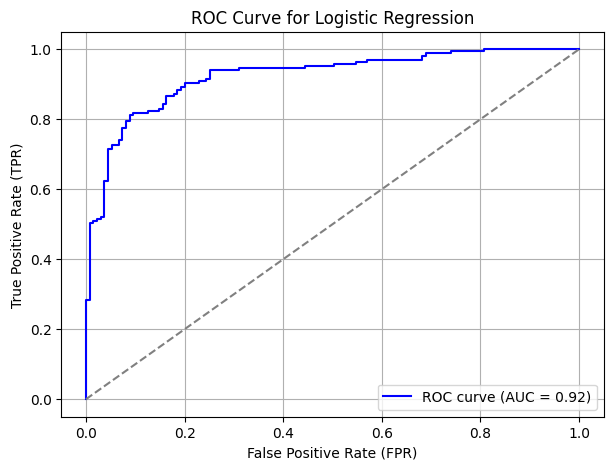

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data (Binary Classification)
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Step 2: Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Get Predicted Probabilities
y_scores = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
print('y_scores',y_scores)
# Step 5: Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
print('fpr',fpr,'tpr',tpr,'thresholds',thresholds)

# Step 6: Compute AUC Score
roc_auc = auc(fpr, tpr)
print('auc',auc,)

# Step 7: Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Explanation of the ROC Curve

Blue Line: The ROC curve of our logistic regression model.

Grey Dashed Line: Represents a random classifier (AUC = 0.5).

AUC Score: AUC value is calculated and displayed in the legend. Higher AUC means better performance.

ROC-AUC Curve: Explanation & Example

The ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve) are used to evaluate the performance of a binary classification model.

ROC Curve: Plots True Positive Rate (TPR) vs. False Positive Rate (FPR) at different classification thresholds.

AUC (Area Under the Curve): Measures the overall performance of the model. AUC ranges from 0 to 1, where:

AUC = 1 → Perfect classifier

AUC = 0.5 → Random guessing (no predictive power)

AUC < 0.5 → Worse than random guessing

Step-by-Step Example (With ROC Curve Plot)
We will:

Train a Logistic Regression classifier.

Compute TPR, FPR for different thresholds.

Plot the ROC curve and calculate AUC.

What is the AUC-ROC curve?

 The AUC-ROC curve, or Area Under the Receiver Operating
 Characteristic curve, is a graphical representation of the performance of
 a binary classification model at various classification thresholds. It is
 commonly used in machine learning to assess the ability of a model to
 distinguish between two classes, typically the positive class (e.g.,
 presence of a disease) and the negative class (e.g., absence of a
 disease).

 Receiver Operating Characteristics (ROC) Curve
 
 ROC stands for Receiver Operating Characteristics, and the ROC curve
 is the graphical representation of the effectiveness of the binary
 classification model. It plots the true positive rate (TPR) vs the false
 positive rate (FPR) at different classification thresholds

Area Under Curve (AUC) Curve:

 AUC stands for the Area Under the Curve, and the AUC curve
 represents the area under the ROC curve. It measures the overall
 performance of the binary classification model. As both TPR and FPR
 range between 0 to 1, So, the area will always lie between 0 and 1, and
 A greater value of AUC denotes better model performance. Our main
 goal is to maximize this area in order to have the highest TPR and
 lowest FPR at the given threshold. The AUC measures the probability
 that the model will assign a randomly chosen positive instance a higher
 predicted probability compared to a randomly chosen negative instance.

 It represents the 
probability with which our model can distinguish
 between the two classes present in our target.

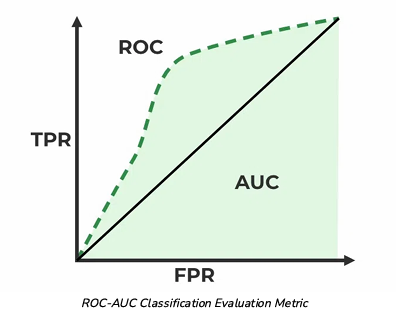

 1. TPR and FPR

 This is the most common definition that you would have encountered
 when you would Google AUC-ROC. Basically, the ROC curve is a graph
 that shows the performance of a classification model at all possible
 thresholds( threshold is a particular value beyond which you say a point
 belongs to a particular class). The curve is plotted between two
 parameters
 
 TPR – True Positive Rate

 FPR – False Positive Rate

 Before understanding, TPR and FPR let us quickly look at the 
matrix

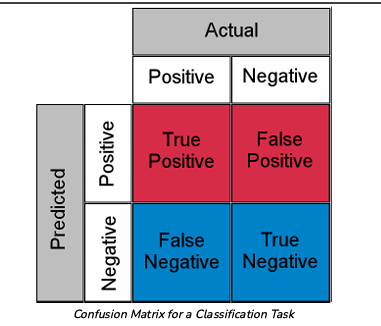

 True Positive: Actual Positive and Predicted as Positive

 True Negative: Actual Negative and Predicted as Negative

 False Positive(Type I Error): Actual Negative but predicted as
 Positive
 
 False Negative(Type II Error): Actual Positive but predicted as
 Negative

False Positive a false alarm and False
 Negative a miss.

 2. Sensitivity / True Positive Rate / Recall

 Basically, TPR/Recall/Sensitivity is the ratio of positive examples that
 are correctly identified.  It represents the ability of the model to correctly
 identify positive instances and is calculated as follows:


 TPR =  TP /(TP+FN)

 Sensitivity/Recall/TPR measures the proportion of actual positive
 instances that are correctly identified by the model as positive.

 3. False Positive Rate

 FPR is the ratio of negative examples that are incorrectly classified.

 FPR = FP/(TN+FP)

4. Specificity

 Specificity measures the proportion of actual negative instances that are
 correctly identified by the model as negative. It represents the ability of
 the model to correctly identify negative instances

 Specificity 
= TN/(TN +FP)
 =1−
 FPR

precision = TP/(TP + FP)

And as said earlier ROC is nothing but the plot between TPR and FPR
 across all possible thresholds and AUC is the entire area beneath this
 ROC curve

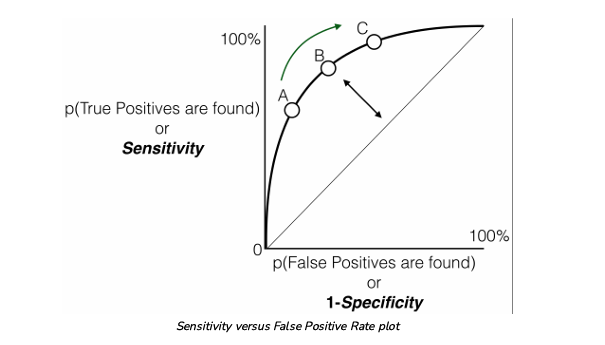

Threshold in the ROC Curve

The threshold in an ROC curve determines the trade-off between True Positives (TP) and False Positives (FP) in a binary classifier.

What is the Threshold?

A threshold is the decision boundary for classifying a sample as positive or negative based on probability scores.
If Threshold = 1 → Only the most confident positive predictions are classified as positive (high precision, low recall).
If Threshold = 0 → Almost everything is classified as positive (high recall, low precision).

 How Threshold Affects the ROC Curve
 
Each point on the ROC curve corresponds to a different threshold.
Lowering the threshold increases both TPR (sensitivity) and FPR (false alarms).
A model’s performance across all thresholds is summarized by AUC (Area Under the Curve).

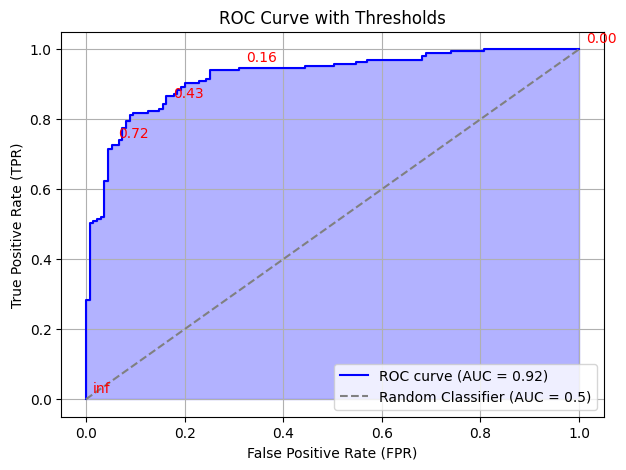

In [2]:
# Re-import necessary libraries after execution state reset
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data (Binary Classification)
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Step 2: Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Get Predicted Probabilities
y_scores = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 5: Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Step 6: Compute AUC Score
roc_auc = auc(fpr, tpr)

# Step 7: Plot ROC Curve with Threshold Annotations
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, alpha=0.3, color='blue')  # Shaded AUC area
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label="Random Classifier (AUC = 0.5)")

# Select a few threshold points to annotate
threshold_indices = np.linspace(0, len(thresholds) - 1, num=5, dtype=int)
for i in threshold_indices:
    plt.annotate(f'{thresholds[i]:.2f}', (fpr[i], tpr[i]), textcoords="offset points", xytext=(5, 5), ha='left', fontsize=10, color='red')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with Thresholds')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Sensitivity and Specificity

Inverse Relationship:  sensitivity and specificity have an inverse
 relationship. When one increases, the other tends to decrease. This
 reflects the inherent trade-off between true positive and true
 negative rates.

 Tuning via Threshold: By adjusting the threshold value, we can
 control the balance between sensitivity and specificity. Lower
 thresholds lead to higher sensitivity (more true positives) at the
 expense of specificity (more false positives). Conversely, raising the
 threshold boosts specificity (fewer false positives) but sacrifices
 sensitivity (more false negatives)

Threshold and False Positive Rate (FPR):

FPR and Specificity Connection: False Positive Rate (FPR) is simply
 the complement of specificity (FPR = 1 – specificity). This signifies
 the direct relationship between them: higher specificity translates to
 lower FPR, and vice versa

FPR Changes with TPR: Similarly, as you observed, the True Positive
 Rate (TPR) and FPR are also linked. An increase in TPR (more true
 positives) generally leads to a rise in FPR (more false positives).
 Conversely, a drop in TPR (fewer true positives) results in a decline in
 FPR (fewer false positives